# Computational Physics U24568
## Lecture 4b - Ordinary Differential Equations I

## The usual imports

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# And a new import - scipy's basic ODE integration function
from scipy.integrate import odeint

## Intro - The Euler Method

A first-order ordinary differential equation can be written as
$$\frac{d y}{dt} = g(y, t)$$
The time derivative can depend on the value of $y(t)$ as well as on $t$.

To solve a differential equation on a computer, we use a discrete approximation to the derivative
$$\frac{d y}{dt} = \frac{y_{i+1} - y_{i}}{t_{i+1} - t_{i}}$$
where we're evaluating $y$ at discrete *time steps* $t_{i}$.

We'll start with the simplest method for solving a differential equation, the Euler method. After that, we will use a SciPy package which is much more sophisticated and accurate.

We'll work with equal time steps given by $t_{i+1} - t_{i} = \tau$. The Euler method makes a simple approximation:

$$y_{i+1} = y_{i} + g_{i} \tau + O(\tau^2)$$

The last term just means that we've ignored any terms of order $\tau^2$ or higher. The bigger $\tau$ is, the bigger the error will be.

We'll see how this works by solving the equation

$$\frac{d y}{dt} = - y ~,$$

which has the solution $y(t) = A~e^{-t}$.

We'll start by defining variables for the time step $\tau$, the starting time $t_0$ and the desired final time $t_f$. We also have an initial condition $y_i$. The initial condition is the value of $y$ at the starting time, i.e. $y(t_0)$.

In [ ]:
tau = 0.1
yi = 1.
t0 = 0
tf = 10.

Now we do the following. At the start, record these values of $t$ and $y$ in a list. Then
 1. Compute the derivative at this value of $t$ and $y$.
 1. Increase $t$ by $\tau$, and $y$ according to the equations above for $y_{i+1}$.
 1. Record the new values, and take another tep unless you've reached the final desired time $t_f$.
At the end, it's convenient to convert the result to a numpy array for ease of plotting.

**Exercise 0.1**: Write the code described above.

In [ ]:
# Answer
tvals = [t0]
yvals = [yi]
currt = t0
curry = yi

while currt <= tf:
    nextt = currt + tau
    nexty = curry - curry * tau
    tvals.append(nextt)
    yvals.append(nexty)
    currt = nextt
    curry = nexty

print(yvals)

[1.0, 0.9, 0.81, 0.7290000000000001, 0.6561000000000001, 0.5904900000000001, 0.531441, 0.4782969, 0.43046721, 0.387420489, 0.3486784401, 0.31381059609, 0.282429536481, 0.2541865828329, 0.22876792454961, 0.20589113209464902, 0.1853020188851841, 0.16677181699666568, 0.15009463529699912, 0.1350851717672992, 0.12157665459056928, 0.10941898913151235, 0.09847709021836111, 0.088629381196525, 0.0797664430768725, 0.07178979876918525, 0.06461081889226672, 0.05814973700304005, 0.052334763302736044, 0.047101286972462436, 0.042391158275216195, 0.03815204244769457, 0.034336838202925116, 0.030903154382632605, 0.027812838944369346, 0.02503155504993241, 0.022528399544939168, 0.02027555959044525, 0.018248003631400726, 0.016423203268260654, 0.014780882941434589, 0.01330279464729113, 0.011972515182562017, 0.010775263664305815, 0.009697737297875235, 0.00872796356808771, 0.00785516721127894, 0.007069650490151046, 0.006362685441135941, 0.005726416897022347, 0.005153775207320112, 0.0046383976865881004, 0.0041

**Exercise 0.2**: Make your code output $t$ and $y$ as the two columns in a numpy array called `result1`. There should be two lines in the plot below which agree - the black expected plot, and the green dots of the Euler method solution. How well do they agree?

In [ ]:
result1 = np.zeros([len(tvals), 2])
result1[:,0] = tvals
result1[:,1] = yvals


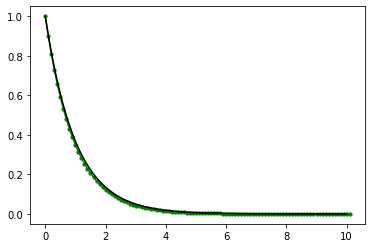

In [ ]:
times = np.linspace(t0, tf, 1000)
plt.plot(result1[:,0], result1[:,1], c='g')
plt.scatter(result1[:,0], result1[:,1], c='g', s=10)
plt.plot(times, np.exp(-times), c='k') # This is the expected result

**Exercise 0.3**: Turn this code into a function which takes tau and returns the `result` data structure. Also create a function which takes the result and makes a plot like the one above.

**Exercise 0.4**: Make the time step above $\tau = 1.5$. What happens?

**Exercise 0.5**: Now vary $\tau$ and see what it takes to make the solution quite accurate.

## Ex 1 - The Decaying Exponential

Now let's start to use scipy's odeint to solve some differential equations with nice sophisticated integrators. We'll continue to solve

$$\frac{d y}{dt} = - y$$

We'll use scipy's odeint method, which is flexible and accurate. To get the documentation of the function, remember you can run `odeint?` in a code block.

We need to tell the solver three different things:
 1. The actual differential equation to solve.
 1. The initial conditions
 1. The values of time to output the solution for.


The differential equation is specified by defining a function. This function takes two arguments. The first is the current $y$. The second is $t$. The function must calculate and return $\frac{d y}{d t}$.

The initial condition here is $y(t_0)$, the value of `y` at the initial time. When there are multiple variables later, we use a list, tuple, or array with the right number of elements.

For the times, we only need an array of the times. We can sample the solution at very spaced-out times, or very finely. The solver will take whatever steps internally it needs to for an accurate solution, but returns only the asked-for values.


**Exercise 1.1**: Define the function below for $\frac{d y}{dt} = - y$ and evaluate the next few cells to check the solution.

In [ ]:
# Defining the derivative function like this.
def deriv1(y, t):
    # Edit here to calculate dydt
    return dydt

In [ ]:
y_init1 = 1. # Starting value for y, at t = 0a

In [ ]:
# We'll solve from t = 0 to t = 4, at 100 equally-spaced points.
times1 = np.linspace(0., 4., 100)

In [ ]:
# Now evaluate this to solve the equation
yarr1 = odeint(deriv1, y_init1, times1)

In [ ]:
# Make a plot
plt.figure(figsize=(8,6))
plt.plot(times1, np.exp(-times), c='g', label='True solution') # The expected answer - don't modify this
plt.scatter(times1, yarr1, s=2, c='k', label='ODE solver')
plt.legend()

**Exercise 1.1**: What do you need to change to double the amplitude of the solution, i.e. make the solution $2 e^{-t}$ rather than $e^{-t}$? Call this `yarr1a` and check the test plot below.

In [ ]:
# Make a plot to test
plt.figure(figsize=(8,6))
plt.plot(times1, 2*np.exp(-times), c='g', label='True solution')  # The expected answer - don't modify this
plt.scatter(times1, yarr1a, s=2, c='k', label='ODE solver')
plt.legend()

**Exercise 1.2**: What do you need to change so that the solution decays twice as fast, i.e. $e^{-2 t}$? You can test by calling this `yarr1b`.

In [ ]:
# Make a plot to test
plt.figure(figsize=(8,6))
plt.plot(times1, 2*np.exp(-times), c='g', label='True solution')
plt.scatter(times1, yarr1b, s=2, c='k', label='ODE solver')
plt.legend()

## Ex 2 - The Sinusoid

Now let's try to get a sinusoid. We can't do that with a single derivative -- we need a second-order equation. It looks like
$$ \frac{d^2 y}{d t^2} = - \omega^2 y$$
But odeint doesn't say anything about second derivatives. How are we supposed to solve this?

The trick is, we're allowed to have many variables. So let's define a new variable
$$v_y = \frac{d y}{d t}$$

If we take another derivative, we get:
$$\frac{d v_y}{d t} = \frac{d^2 y}{d t}$$

Now we can re-write the above equation as two pieces:
$$\begin{align}
\frac{d v_y}{d t} &= -\omega^2 y \\
\frac{d y}{d t} &= v_y
\end{align}$$

This trick is used *very* often, anytime there are second derivatives (or higher). We've gone from one second-order equation to two first-order equations. Our new variable is the velocity.

The main change is in the derivative function. The first argument is now an array of `[y, v_y]`. You can think of this array as 'the state of the world'. It's not just the position, but also the velocity. The function needs to look at that state, and calculate the derivative of each thing. The derivative of $y$ is $v_y$ by definition.

In [ ]:
times2 = np.linspace(0.,200.,10000)

**Exercise 2.1**: Define the derivative function, solve, and plot. You can set $\omega = 1$ for now.

In [ ]:
# The derivative function become
def deriv2(state, t):
    y, vy = state # Split the state into named variables for convenience
    # Edit: Calculate the derivatives
    return (dydt, dvydt) # Return a tuple of the derivatives.

In [ ]:
y_init2 = (1., 0.) # Starting value for y, vy at t = 0

In [ ]:
yarr2 = odeint(derive2, y_init2, times2)
print("The output has shape", yarr2.shape)

*The* result now has two variables, each one is its own column. Each time is a row. We can use numpy's multi-dimensional slicing to access just the first variable by doing

yarr2\[:, 0\]

In the first slot, we put the slice operator ':' all by itself. This just means take all the data in that dimension. Then we specify that we want column zero, which is the first variable since Python counts from zero.

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(times2, yarr2[:,0], 'r:')
plt.xlabel('x')

**Exercise 2.1**: One fancy thing we can do is a phase plot. Instead of $y$ versus $t$, plot $y$ versus $v_y$. This is often useful for dynamic and chaotic systems. Make this plot.

In [ ]:
# Answer


**Exercise 2.3**: What do you change to double the amplitude?

**Exercise 2.4**: Can you change the result in y from a cosine to a sine, only by modifying the initial conditions? Hint: A sine starts at zero, but it has some initial slope. Once again, you're changing the input to the solver.

**Exercise 2.5**: Can you change the frequency in the same way? If not, how do you change it?

**Exercise 2.6**: Copying the example from above, can you modify the equation to add damping? The result should be a decaying sinusoid.

## Ex 3 - Coupled Equations

We can also have multiple dependent variables, and their equations can be coupled. A generic linear form with two variables is

$$\begin{align}
\frac{d x}{d t} &= a x + b y \\
\frac{d y}{d t} &= c x + d y
\end{align}$$

where $\{a, b, c, d\}$ are constants.

Choosing the constants correctly can give several interesting behaviors.

**Exercise 3** (challenging): Find and plot choices of the constants which make all of the following behaviors happen when plotting $x$ versus $y$ (you can use the color on a scatter plot to represent time).
 1. A clockwise circle
 1. A counter-clockwise circle
 1. A shrinking spiral
 1. A growing spiral
 1. A hyperbola (this will require being careful with initial conditions as well).

## Ex 4 - Nonlinear Equation

The van der Pol equation describes a nonlinearly damped oscillator. It can't be solved analytically, but using a computer it's no more difficult than the others. The equation is:

$$\frac{d^2 x}{dt^2} - \mu (1 - x^2) \frac{d x}{d t} + x = 0$$

**Exercise**: Make a phase plot of this for different $\mu$, as well as different initial conditions. Also plot $x(t)$. The [Wikipedia page](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) contains result you can compare against.